# An analytical workflow for the estimation of the "transfer function" of spiking neuron model

_Prerequisites_: Basics about the theory of point processes. Membrane Equation for the single compartment model (e.g reproduce Kuhn et al. 2004).

For the fluctuations, it is adapted from the strategy suggested in the experimental study of Zerlaut et al., ~2016. Mean and standard deviation identical to Kuhn et al. 2004, just adapted to get the autocorrelation time... Here, instead of the "fluctuating current + static conductance" presented in the paper, we apply this strategy on an input made of and excitatory and an inhibitory shotnoise with conductance-based synapses. See also the same calculus for a model of a dendritic structure and presynaptic correlations in Zerlaut & Destexhe ~2016 (a lot heavier though)


## 1) Properties of the membrane potential fluctuations: $\mu_V, \sigma_V, \tau_V$


### For $\mu_V$

\begin{equation}
 \mu_V =  \frac{ g_L \, E_L + \sum_{syn} K_{syn} \, \nu_{syn} \, \tau_{syn} \, Q_{syn} \, E_{syn} }{
 g_L  + \sum_{syn} K_{syn} \, \nu_{syn} \, \tau_{syn} \, Q_{syn}}
\end{equation}

so we need to calculate the PSP, its squared Fourier tranform and integrate it !

### For $\sigma_V$ and $\tau_V$ 


\begin{equation}
 \sigma_V  = \sqrt{ \int_\mathbb{R} P_V(f) \, df }
\end{equation}

and

\begin{equation}
  \tau_V = \frac{1}{2} \, \big( \frac{\int_\mathbb{R} P_V(f) \, d f}{ P_V(0) } \big)^{-1}
\end{equation}

and we get the power spectrum density from shotnoise theory:

\begin{equation}
 P_V(f)  =  \sum_{syn} \nu_{syn} \, \| \hat{\mathrm{PSP}}(f) \|^2
\end{equation}

so we need to calculate the PSP, its squared Fourier tranform and integrate it !

#### derivation:

Equation for $PSP(t)$ around \mu_V:

\begin{equation}
\left\{
\begin{split}
& \tau_\mathrm{m}^\mathrm{eff} \frac{d PSP}{dt} + PSP = U_{syn} \, \mathcal{H}(t) \, e^{\frac{-t}{\tau_{syn}}} \\
& U_{syn} = \frac{Q_{syn}}{\mu_G} (E_{syn} - \mu_V)
\end{split}
\right.
\end{equation}


Thus, a single excitatory or inhibitory post-synaptic potential event from
this input will have the following time course around $\mu_V$:


\begin{equation}
 PSP(t) =U_{syn} \, \frac{\tau_{syn}}{ \tau_\mathrm{m}^\mathrm{eff} - \tau_{syn} }
 \, (e^{-\frac{t}{\tau_\mathrm{m}^\mathrm{eff}}} - e^{-\frac{t}{\tau_S}})  \, \mathcal{H}(t)
\end{equation}

#### from now on: using sympy

In [31]:
from sympy import exp, cosh, sinh, init_printing, pprint, simplify, latex, symbols,\
  Function, sign, factor, fraction, pi, integrate,oo
from sympy.abc import a,b
from sympy import inverse_fourier_transform, fourier_transform
init_printing()

Form of the Post-Synaptic Potential event:


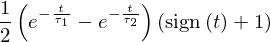

In [32]:
# we simplify it, to take the 

f, t, T1, T2, Usyn = symbols('f, t, tau_1, tau2, U_{syn}', real=True)
PSP = Function('PSP')
PSP = (exp(-t/T1)-exp(-t/T2))*(1+sign(t))/2
print 'Form of the Post-Synaptic Potential event:' 
PSP

Fourier Transform of the PSP event:


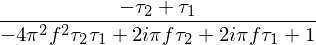

In [33]:
print 'Fourier Transform of the PSP event:'
PSP_hat = Function('PSP_hat')
PSP_hat = factor(fourier_transform(PSP, t, f))
numerator, denominator = fraction(PSP_hat)
simplify(PSP_hat)

Square modulus of the Fourier Transform of the PSP event:


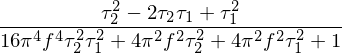

In [34]:
from sympy.functions import Abs, conjugate
print 'Square modulus of the Fourier Transform of the PSP event:'
PSP_hat2 = simplify((PSP_hat)*conjugate(PSP_hat))
numerator, denominator = fraction(PSP_hat2)
PSP_hat2

In [35]:
# then we simplify to integrate
simplify(numerator), factor(simplify(denominator))

So first:

\begin{equation}
\| \hat{\mathrm{PSP}}(0) \|^2 = (U_{syn} \cdot \tau_{syn})^2 
\end{equation}

and:

\begin{equation}
\| \hat{\mathrm{PSP}}(f) \|^2 = \frac{(U_{syn} \cdot \tau_{syn})^2}{
 \big( (2 \, \pi \, f \tau_\mathrm{m}^\mathrm{eff}) ^2 + 1 \big)\big( (2 \, \pi \, f \tau_{syn}) ^2 + 1 \big)}
\end{equation}


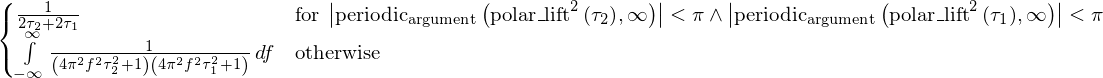

In [36]:
# we will need to integrate this

func = Function('func')
func = 1/((1+4*pi**2*T1**2*f**2)*(1+4*pi**2*T2**2*f**2))
simplify(integrate(func, (f, -oo, oo)))

#### Finally:

because:

\begin{equation}
\int_\mathbb{R}  df \, \| \hat{\mathrm{PSP}}(f) \|^2 = \frac{(U_{syn} \cdot \tau_{syn})^2}{2 \, (\tau_\mathrm{m}^\mathrm{eff} + \tau_{syn} ) }
\end{equation}

we get:

\begin{equation}
 \sigma_V  = \sqrt{ \sum_{syn} K_{syn} \, \nu_{syn} \, \frac{(U_{syn} \cdot \tau_{syn})^2}{2 \, (\tau_\mathrm{m}^\mathrm{eff} + \tau_{syn} ) } }
\end{equation}

and

\begin{equation}
  \tau_V = \frac{1}{2} \, \Big( \frac{
  \sum_{syn} \big( K_{syn} \, \nu_{syn} \, (U_{syn} \cdot \tau_{syn})^2 /(\tau_\mathrm{m}^\mathrm{eff} + \tau_{syn} ) \big)
  }{ \sum_{syn} \big( K_{syn} \, \nu_{syn} \, (U_{syn} \cdot \tau_{syn})^2\big) } \Big)^{-1}
\end{equation}





## 2) Spiking probability from the fluctuations properties

In [ ]:
# each neuronal model is described by an effective threshold that is a 

# second order polynomial of 3 variables (muV, sV, Tv) + linear dependency on total conductance
P0, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10 = symbols("P0, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10") 
# scaling factors (useless, will be global variables, it's just to insure that the P coefficents are all in the same range)
muV0, DmuV0, sV0, DsV0, TvN0, DTvN0 = symbols('muV0, dmuV, sV0, dsV, Tv0, dTv')
TvN = symbols('TvN')
TvN = Tv/Tm0 # normalized autocorrelation time (because neurons can have varying time constants)

Vthre_eff = symbols('Vthre_eff') 
# second order polynomial
Vthre_eff = P0+P1*(muV-muV0)/DmuV0+\
            P2*(sV-sV0)/DsV0+P3*(TvN-TvN0)/DTvN0+\
            P4*log(muG/gL)+P5*((muV-muV0)/DmuV0)**2+\
            P6*((sV-sV0)/DsV0)**2+P7*((TvN-TvN0)/DTvN0)**2+\
            P8*(muV-muV0)/DmuV0*(sV-sV0)/DsV0+\
            P9*(muV-muV0)/DmuV0*(TvN-TvN0)/DTvN0+\
            P10*(sV-sV0)/DsV0*(TvN-TvN0)/DTvN0

# Finally, spiking probability
Fout = symbols('Fout') 
Fout = 1/2/Tv*erfc((Vthre_eff-muV)/np.sqrt(2)/sV)

In [ ]:
# then we will also need the derivatives with respect to the presynaptic activities
diff(Fout, fe)

In [ ]:
diff(Fout, fi)

In [ ]:
diff(diff(Fout, fe), fe)

In [ ]:
diff(diff(Fout, fe), fi)

In [ ]:
diff(diff(Fout, fi), fi)